# Business Understanding

### Overview
This dataset is a collection of artists, songs, and lyrics downloaded fromKaggle: https://www.kaggle.com/mousehead/songlyrics and scraped from the lyrics website: lyricsfreak.com. Originally, the dataset consisted of 57,650 songs, but was randomly sampled down to 12,241 songs by artist due to computational problems.

### Purpose
The dataset itself was webscraped for the explicit purpose of studying Natural Language Processing.
LyricsFreak.com is a website that provides lyrics to songs through crowd sourcing, targeted mostly to English speaking users.

### Importance and Usefulness
This data is important because we are interested in gathering data about certain words that are used in various songs across genres. We will know if we have gathered useful data by identifying prominent words within the dataset. Since the dataset is comprised of songs across all genres, we want to identify words used across genres. If there are no common words, then we can assume that genre lyrics differ enough to have very few or no commonalities.

# Data Encoding

### Read in Data as Strings

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./songlyrics/songdatatest.csv')

pd.options.display.max_columns = 999
pd.options.display.max_rows = 15

strings = df['text'].values

df.head()

,artist,text
0,Drake,[Verse 1] \nBoomin' out in South Gwinnett lik...
1,Drake,Feat. Gucci Mane \n \n[Gucci Mane:] \nI'm s...
2,Drake,You know a lot of girls be \nThinking my song...
3,Drake,This here is on some truthful shit \nIt seems...
4,Drake,"[Verse:] \nWord on road, it's the clique abou..."


### Verify Data Quality
The data set has already been cleaned of non-english lyrics, extremely short and long lyrics, and non-ASCII symbols. We will remove stop words using the SKLearn CountVectorizer's built in stop word list (for English). Because this website in crowdsourced, there is potential for typos, but because lyrics can be corrected, the large number of words in the document, and the conclusions that we were looking for, there was no need to particularly cleanse these typos except for computational purposes.
Lastly, despite the person who collected the dataset's attempt to clear out any non-English words, there are still some instances where non-English words are present (for example, Korean romanized into English).

### Convert to Bag of Words

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
bag_words = count_vect.fit_transform(strings)
print("# of rows: ", bag_words.shape[0])
print("# of unique words:", bag_words.shape[1])

bag_df = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())

# of rows:  12241
# of unique words: 38355


In [49]:
bag_df

,00,000,007,02900,03,04,06,07,08,09,10,100,1000,101,1017,102,103,104,109,10th,10x,11,110,112,115,117,11th,12,120,1200,121st,123,1234,1239,1259,129,12a,12th,13,132s,13th,14,1415926535,143,144,145,14th,15,150,1565,157,15th,15x,16,165,16th,16x,17,1777,18,180,1832,1842,1845,1849,187,18th,19,1909,1910,1916,1926,1929,1939,1942,1943,1947,1948,1949,1950,1952,1953,1958,1960,1963,1965,1966,1968,1969,1970,1971,1972,1973,1975,1976,1977,1978,1979,1980,1984,1985,1986,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,1da,1st,1x,20,200,2000,2001,2002,2003,2004,2006,2007,2008,2010,2012,2020,2033,20s,20th,21,211,213,213s,214158952498921415895249589214158952495892141589,21st,22,22nd,23,235,24,24149,24601,24s,25,250,2500,25s,25th,26,264,27,28,281,29,29th,2d,2nd,2pac,2x,30,300,3000,300e,305,31,312,313,313s,31st,32,321,325,3279,33,338,35,357,36,365,37,37202,37405,38,380,3846,39,39th,3am,3d,3po,3rd,3x,40,401,404,40ounce,40s,41,411,412,42,4201,42nd,43,44,442,44d,45,47,48,4808651,49,4a,4am,4ever,4real,4th,4x,50,500,5000,501s,502,50288419,504,505,50s,51,515,52,52nd,53,54,55,550,55th,578,5789,58,582319749,584,58hrs,59,59230781,5am,5th,5x,60,61,62,63,634,64,640,6406286208,65,66,666,67,680,69,6am,6th,6x,70,700,707,716939937510,72,727,73,735,74,745,747,75,75th,78,79,7am,7th,7twenty,7twenty7,7x,7xs,80,800,808,80k,80s,81,818s,81st,82,821,83,84,85,86,86400,87,88,89,897932,89s,8am,8th,8times,8x,8x10,90,900,9000,90s,91,911,92,93,94,95,9500,96,97,98,99,99th,9mm,9th,a1a,a200,aa,aaa,aaaa,aaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh,aaaaaaaaaaaaah,aaaaaaahhh,aaaaaah,aaaaaalright,aaaaahhhhhhhhhhh,aaaaall,aaaah,aaaahh,aaaahhh,aaaahhhh,aaaalaaaaaa,aaaall,aaah,aaahhhhhhh,aag,aagh,aah,aahh,aahhh,aaisa,aaja,aalagaan,aalay,aaliyah,aanhin,aaow,aargh,aaron,aas,aasa,aati,aaw,aayy,ab,aba,abacinate,abandon,abandoned,abandoning,abandonment,abandons,abasi,abates,abba,abbey,abbiamo,abbie,abby,abc,abdomen,abduct,abducted,abduction,abductions,abducts,abdul,abednego,abel,abercrombie,aberdare,aberdeen,aberdine,abernathy,abhi,abhise,abhor,abhorring,abhors,abide,abides,abiding,abigail,abilene,ability,ablaze,able,ablige,abnormal,abnormally,abnoxious,aboard,abode,abolish,abolishing,abominable,abomination,aboriginality,aborigine,abort,aborted,aborting,abortion,aborts,abou,abound,abounding,abounds,abracadabra,abraham,abrasive,abreezy,abrewin,abridged,abroad,abroadforeign,abrupt,abs,abscam,abscence,absence,absent,absentee,absentia,absessed,absinthe,absolute,absolutely,absolution,absolutley,absolve,absolved,absorbed,absorbing,abstain,abstract,absurd,abud,abuelo,abundance,abundant,abundantly,abuse,abused,abuser,abusers,abuses,abusin,abusing,abusive,abutin,abyss,abyssinian,ac,academia,academic,academics,academy,acapella,acapo,acapulco,acc,accapella,accelerate,accelerating,acceleration,accent,accept,acceptable,acceptance,accepted,...,wronge,wronged,wronger,wrongfully,wrongs,wroongg,wrote,wrought,wrung,wry,wth,wu,wumble,wunder,wunderbar,wunderkind,wurst,wuss,wussup,wut,wuthering,wwell,www,wyapek,wyclef,wylin,wyling,wynd,wyomin,wyoming,x1,x10,x12,x14,x15,x16,x17,x19,x2,x20,x3,x30,x4,x5,x6,x7,x8,x9,xan,xanadu,xanax,xanaxes,xenon,xmas,xo,xoxoxoxxoxoxoxoxoxoox,xs,xtc,xylophone,xzibit,y2,y2k,ya,yachbosh,yachdav,yachidah,yacht,yachts,yachzeru,yachzor,yack,yackety,yackin,yad,yaday,yadid,yaeh,yafeh,yah,yahhh,yahtzee,yai,yaj,yak,yakap,yakashar,yakety,yakkin,yaknahmsayin,yaknowhati,yakob,yaldati,yalduti,yale,yall,yallin,yam,yami,yamim,yan,yancy,yandel,yang,yank,yanked,yankee,yankees,yanking,yanno,yao,yaoh,yappin,yapping,yarad,yard,yards,yarn,yarninu,yarns,yaself,yash,yashen,yashu,yashvu,yasig,yasitech,yasss,yaw,yawing,yawl,yawn,yawnin,yawning,yawns,yay,yaya,yayaya,yayayayayaya,yayir,yayo,yb,ye,yea,yeaa,yeaaa,yeaaaaa,yeaaaaaaaaaaaaaaahh,yeaaaaaaaaah,yeaaaaaaaahhhhhhh,yeaaaaaah,yeaaaah,yeaaaahhhh,yeaaah,yeaah,yeah,yeahh,yeahhh,yeahhhh,yeahhhhh,yeahhhhhh,yeahhhhhheee,yeahhhhhhh,yeahhhhhhhh,yeahhhhhhhhhhhhhh,year,yearbook,yearly,yearn,yearned,yearnin,yearning,yearns,yearny,years,ye

In [17]:
bag_df.sum().sort_values()[-15:]

come     7799
let      8332
yeah     8344
want     8696
baby     9357
time     9419
ve       9822
got     11127
ll      12591
like    14814
oh      14924
just    15337
know    16312
don     18227
love    20226
dtype: int64

#### Bag of Words Conclusion:
Unsurprisingly, the word 'love' is the most commonly used words across all the songs in our sample set. The next word most commonly used word is 'don' which is probably the word 'don't'. Also, the words 've' and 'll' are probably part of contractions such as for the words "could've" and "she'll". Other often used nouns include 'baby' and 'time'.

### TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vect.fit_transform(strings)

tfidf_df = pd.DataFrame(data=tfidf.toarray(),columns=tfidf_vect.get_feature_names())

In [23]:
tfidf_df

00  000  007  02900   03   04   06   07   08   09        10  100  \
0      0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
1      0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.076721  0.0   
2      0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
3      0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
4      0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
5      0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
6      0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
...    ...  ...  ...    ...  ...  ...  ...  ...  ...  ...       ...  ...   
12234  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
12235  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
12236  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
12237  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
12238  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
12239  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
12240  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   

       1000  101  1017  102  103  104  109  10th  10x       11  110  112  115  \
0       0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
1       0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
2       0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
3       0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
4       0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
5       0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
6       0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
...     ...  ...   ...  ...  ...  ...  ...   ...  ...      ...  ...  ...  ...   
12234   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
12235   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.06976  0.0  0.0  0.0   
12236   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
12237   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
12238   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
12239   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   
12240   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.00000  0.0  0.0  0.0   

       117  11th        12  120  1200  121st  123  1234  1239  1259  129  12a  \
0      0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
1      0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
2      0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
3      0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
4      0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
5      0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
6      0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
...    ...   ...       ...  ...   ...    ...  ...   ...   ...   ...  ...  ...   
12234  0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
12235  0.0   0.0  0.064231  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
12236  0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
12237  0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
12238  0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
12239  0.0   0.0  0.000000  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   
12240  0.0   0.0  0.079456  0.0   0.0    0.0  0.0   0.0   0.0   0.0  0.0  0.0   

       12th   13  132s  13th   14  1415926535  143  144  145  14th        15  \
0       0.0  0.0   0.0   0.0  0.0         0.0  0.0  0.0  0.0   0.0  0.000000   
1       0.0  0.0   0.0   0.0  0.0    

In [44]:
tfidf_df.max().sort_values()[-50:]

knock        0.960360
ontario      0.960762
survivor     0.962181
oh           0.962569
alleluia     0.963751
har          0.964020
aah          0.964031
               ...   
row          0.988683
allelujah    0.989357
diddley      0.989725
rape         0.991357
la           0.991687
doghouse     0.992747
soldier      0.997214
dtype: float64

#### TF/IDF Conclusion
The high number tf/idf's approaching one indicates that there are many songs that use a unique word (that other songs do not use). However, when looking at words such as "allelujah", another factor could be a unique spelling of the word. Most people would spell the word "hallelujah", but there is a possiblity that one user that filled in lyrics for a song that used the word "hallelujah" often could have spelled the word like "allelujah". Another entry in the dataframe to support this claim is the word "alleluia".

# Data Visualization
### Statistical Summaries

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

hist_data = tfidf_df.max().sort_values()
# hist_data = hist_data.to_frame()
# print(hist_data.info())
# bins = pd.cut(hist_data, bins= 10)
# hist_grouped = hist_data.groupby(bins)
# print(hist_grouped[0])

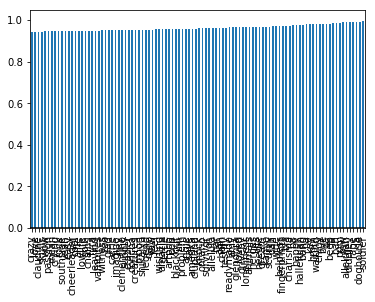

In [8]:
ax = hist_data[-100:].plot(kind="bar")
plt.axhline(0, color='k')

In [10]:
# plt.style.use('ggplot')
# plt.figure()
# ax = top_ten.plot(kind="bar")
# plt.axhline(0, color='k')


### Target Class
Below we have a list of six mainstream rap and R&B artists. We go through and find the top ten most frequently used words by each artist. Then, we have done a bag of words model on the lyrics of a subset of 70 of their songs to identify the vocabulary size of the rappers. We took the subset of 70 songs so that we could compare the data accurately (R. Kelly only had 70 songs, which ended up misrepresenting the data).

In [76]:
df_group = df.groupby("artist")
artist_cv = CountVectorizer(stop_words="english")
art_list = []

(70, 4256)


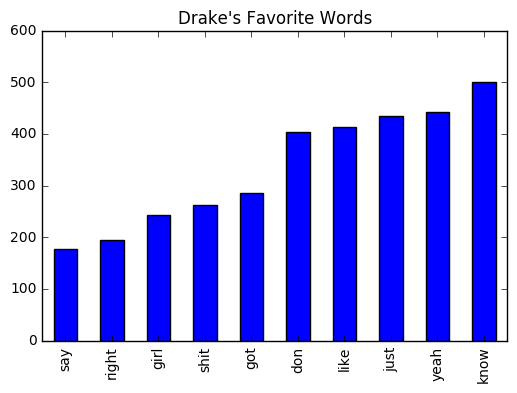

In [77]:
group = df.query('artist == "Drake"')
bag = artist_cv.fit_transform(group['text']) 
bag = pd.DataFrame(data=bag.toarray(), columns=artist_cv.get_feature_names())
for _x, count in bag.sum().iteritems():
    total_words += count
bag.sum().sort_values()[-10:].plot(kind = "bar", title = "Drake's Favorite Words")
bag = bag[-70:]
#ups is unique_words per song & uow is unique words/total word count

art_list.append({'artist': 'Drake', 'songs': bag.shape[0], 'unique_words': bag.shape[1], 'ups': bag.shape[1]/bag.shape[0], 'word_count': total_words, 'uow': bag.shape[1]/total_words})
print(bag.shape)

(70, 4843)


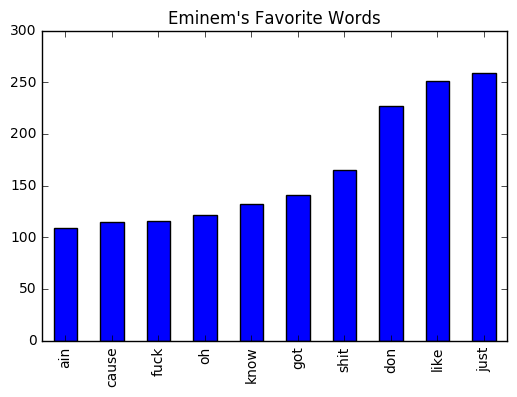

In [78]:
group = df.query('artist == "Eminem"')
bag = artist_cv.fit_transform(group['text']) 
bag = pd.DataFrame(data=bag.toarray(), columns=artist_cv.get_feature_names())
for _x, count in bag.sum().iteritems():
    total_words += count
bag.sum().sort_values()[-10:].plot(kind = "bar", title = "Eminem's Favorite Words")
bag = bag[-70:]
#ups is unique_words per song & uow is unique words/total word count

art_list.append({'artist': 'Eminem', 'songs': bag.shape[0], 'unique_words': bag.shape[1], 'ups': bag.shape[1]/bag.shape[0], 'word_count': total_words, 'uow': bag.shape[1]/total_words})
print(bag.shape)

(70, 1918)


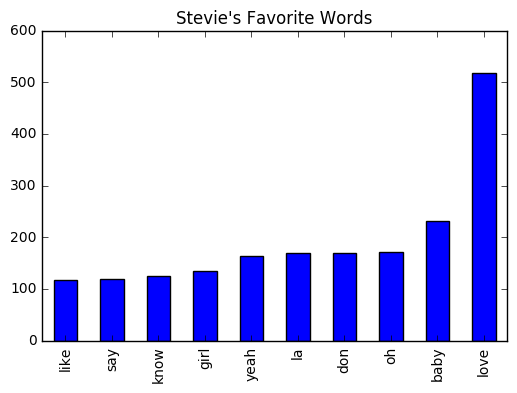

In [79]:
group = df.query('artist == "Stevie Wonder"')
bag = artist_cv.fit_transform(group['text']) 
bag = pd.DataFrame(data=bag.toarray(), columns=artist_cv.get_feature_names())
for _x, count in bag.sum().iteritems():
    total_words += count
bag.sum().sort_values()[-10:].plot(kind = "bar", title = "Stevie's Favorite Words")
bag = bag[-70:]
#ups is unique_words per song & uow is unique words/total word count

art_list.append({'artist': 'Stevie Wonder', 'songs': bag.shape[0], 'unique_words': bag.shape[1], 'ups': bag.shape[1]/bag.shape[0], 'word_count': total_words, 'uow': bag.shape[1]/total_words})
print(bag.shape)

(70, 3355)


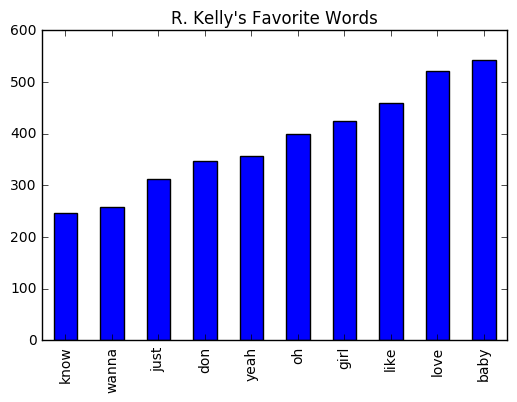

In [80]:
group = df.query('artist == "R. Kelly"')
bag = artist_cv.fit_transform(group['text']) 
bag = pd.DataFrame(data=bag.toarray(), columns=artist_cv.get_feature_names())
for _x, count in bag.sum().iteritems():
    total_words += count
bag.sum().sort_values()[-10:].plot(kind = "bar", title = "R. Kelly's Favorite Words")
bag = bag[-70:]
#ups is unique_words per song & uow is unique words/total word count

art_list.append({'artist': 'R. Kelly', 'songs': bag.shape[0], 'unique_words': bag.shape[1], 'ups': bag.shape[1]/bag.shape[0], 'word_count': total_words, 'uow': bag.shape[1]/total_words})
print(bag.shape)

(70, 4587)


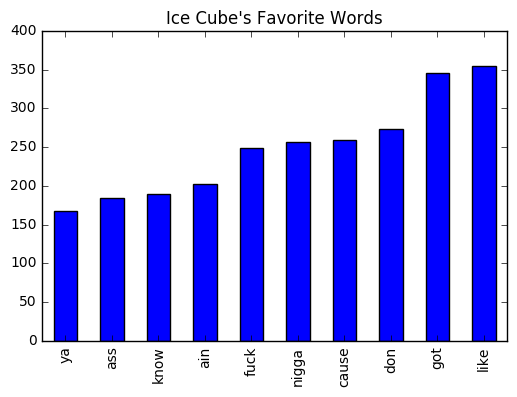

In [81]:
group = df.query('artist == "Ice Cube"')
bag = artist_cv.fit_transform(group['text']) 
bag = pd.DataFrame(data=bag.toarray(), columns=artist_cv.get_feature_names())
for _x, count in bag.sum().iteritems():
    total_words += count
bag.sum().sort_values()[-10:].plot(kind = "bar", title = "Ice Cube's Favorite Words")
bag = bag[-70:]
#ups is unique_words per song & uow is unique words/total word count

art_list.append({'artist': 'Ice Cube', 'songs': bag.shape[0], 'unique_words': bag.shape[1], 'ups': bag.shape[1]/bag.shape[0], 'word_count': total_words, 'uow': bag.shape[1]/total_words})
print(bag.shape)

(70, 4607)


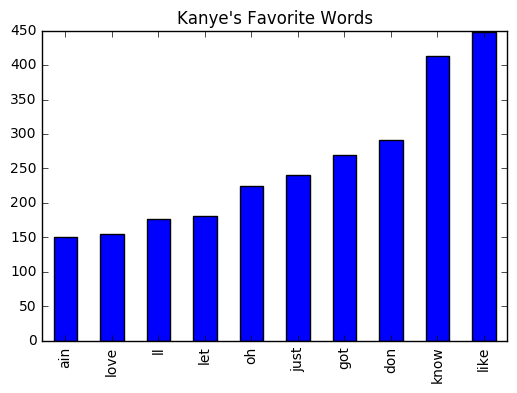

In [82]:
group = df.query('artist == "Kanye West"')
bag = artist_cv.fit_transform(group['text']) 
bag = pd.DataFrame(data=bag.toarray(), columns=artist_cv.get_feature_names())
for _x, count in bag.sum().iteritems():
    total_words += count
bag.sum().sort_values()[-10:].plot(kind = "bar", title = "Kanye's Favorite Words")
bag = bag[-70:]
#ups is unique_words per song & uow is unique words/total word count

art_list.append({'artist': 'Kanye West', 'songs': bag.shape[0], 'unique_words': bag.shape[1], 'ups': bag.shape[1]/bag.shape[0], 'word_count': total_words, 'uow': bag.shape[1]/total_words})
print(bag.shape)

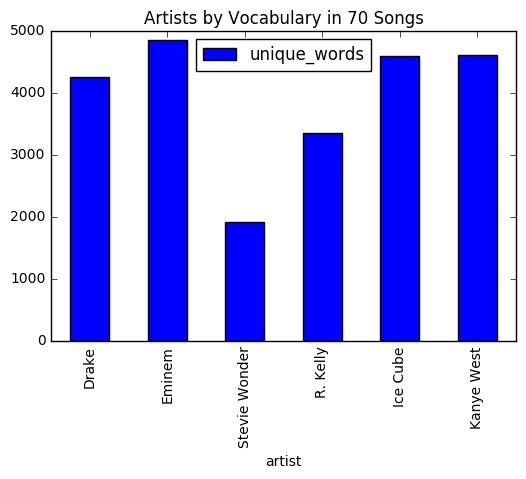

In [86]:
art_df = pd.DataFrame(art_list)
art_df.plot(kind = "bar", x = "artist", y = "unique_words", title = 'Artists by Vocabulary in 70 Songs')

So from the bar chart above we can see that Eminem has a substantially larger vocabulary compared to his five peers, while Stevie Wonder has the lowest. We surmise this is because he is blind and can't read (just kidding...maybe?). All artists had the word "like" in their top ten, while Stevie and R. Kelly both had "baby" and "love" as their two top words. Most likely because they are more R&B artists than rappers. The other four rappers had more profanity and love was only in one of the rapper's top ten. Also most rappers had "don" (a shortening of "don't") in their top ten.

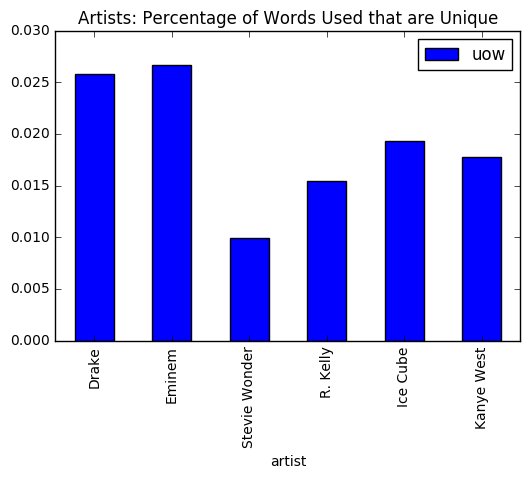

In [87]:
art_df.plot(kind="bar", x="artist", y="uow", title="Artists: Percentage of Words Used that are Unique")

Here we can see the percentage of words that are unique for each artist. Eminem still reigns as the person with highest usage of unique words, but Drake beats out Kanye West and Ice Cube, differing from the total number of unique words in 70 songs. Drake uses more unique words per every word he says compared to Kanye West and Ice Cube. Our R&B singers still lag behind. However, this can be because in R&B, fewer words are used in singing as opposed to rap which has much more talkative style to it. Therefore, it is hard to conclude that R. Kelly and Stevie Wonder have a smaller vocabulary compared to the rappers when the reason could be in fact their style of music.